(3) 데이터 확대 방법들 중 하나를 적용한 후, 2번 문제의 신경망학습

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform1 = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform2 = transforms.Compose(
[transforms.RandomRotation(10),
transforms.RandomHorizontalFlip(),
transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset1 = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform1)
trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform2)

trainset = torch.utils.data.ConcatDataset([trainset1, trainset2])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform1)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
#functions to show image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [5]:
# 훈련집합의 일부사진들 확인
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

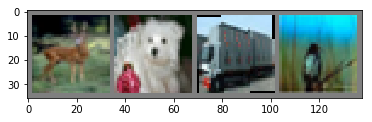

In [7]:
# show images
imshow(torchvision.utils.make_grid(images))

In [8]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

 deer   dog truck  bird


In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):      
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))    
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [11]:
import torch.optim as optim

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  1000] loss: 2.279
[1,  2000] loss: 2.105
[1,  3000] loss: 1.911
[1,  4000] loss: 1.801
[1,  5000] loss: 1.734
[1,  6000] loss: 1.693
[1,  7000] loss: 1.600
[1,  8000] loss: 1.577
[1,  9000] loss: 1.516
[1, 10000] loss: 1.515
[1, 11000] loss: 1.489
[1, 12000] loss: 1.475
[1, 13000] loss: 1.453
[1, 14000] loss: 1.422
[1, 15000] loss: 1.400
[1, 16000] loss: 1.389
[1, 17000] loss: 1.351
[1, 18000] loss: 1.341
[1, 19000] loss: 1.338
[1, 20000] loss: 1.373
[1, 21000] loss: 1.298
[1, 22000] loss: 1.321
[1, 23000] loss: 1.293
[1, 24000] loss: 1.259
[1, 25000] loss: 1.259
[2,  1000] loss: 1.228
[2,  2000] loss: 1.237
[2,  3000] loss: 1.256
[2,  4000] loss: 1.254
[2,  5000] loss: 1.195
[2,  6000] loss: 1.209
[2,  7000] loss: 1.201
[2,  8000] loss: 1.210
[2,  9000] loss: 1.211
[2, 10000] loss: 1.189
[2, 11000] loss: 1.195
[2, 12000] loss: 1.216
[2, 13000] loss: 1.186
[2, 14000] loss: 1.169
[2, 15000] loss: 1.158
[2, 16000] loss: 1.204
[2, 17000] loss: 1.155
[2, 18000] loss: 1.181
[2, 19000] 

In [14]:
#performance on the whole test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


In [15]:
#performance on each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 49 %
Accuracy of   car : 69 %
Accuracy of  bird : 37 %
Accuracy of   cat : 32 %
Accuracy of  deer : 64 %
Accuracy of   dog : 47 %
Accuracy of  frog : 64 %
Accuracy of horse : 68 %
Accuracy of  ship : 86 %
Accuracy of truck : 61 %
